
K  :  62 
p0 :  8 
r  :  0.576184780881
****************************************************************
Error 18.8306540146


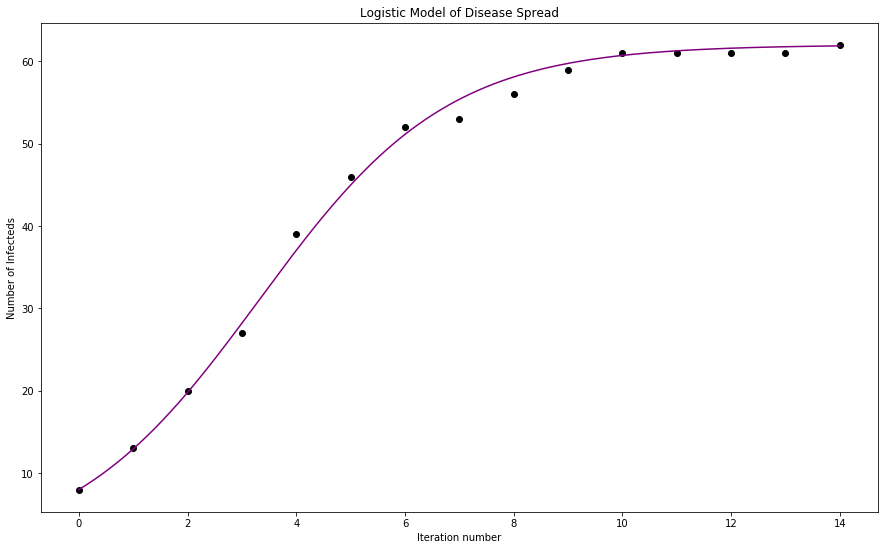

In [2]:
#Author:  Ryan Florida
#Purpose: This is a program tailored to the M&M modeling project that uses a
#         combination of the Bisection Method and Newton's Method in order to
#         find the minimum of the least squares.

import matplotlib.pyplot as plt
from numpy import exp, array, linspace, sum
from numpy.random import random

#This will standardize all figure sizes.
plt.rcParams["figure.figsize"] = [15,9]

#Constant to determine how many bisections and recursive calls to perform.
RANGE = 20

#******************************************************************************
#0: Main.
def main():
    #Fill data arrays and initialize values.
    x = [a for a in range(15)]
    y = [8, 13, 20, 27, 39, 46, 52, 53, 56, 59, 61, 61, 61, 61, 62]
    #Carrying capacity, initial population size, initial guess for r-value.
    K, p0, r = (62, 8, 1)
    Plot(x,y,1)

    #Set lower and upper value to r.
    r_low = r_high = r

    #If the derivative of the sum of squares function is already zero (i.e. we
    #already have a minimum), then we are done.
    if df(r, x, y, p0, K) == 0:
        #Curve to fit.
        Fxn = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))
        Plot(x,Fxn,0,1)
        exit()
    #Find appropriate values to use for bisection.
    while df(r_low, x, y, p0, K) > 0:
        r_low -= 0.5
    while df(r_high, x, y, p0, K) < 0:
        r_high += 0.5

    #Use Bisection Method to find seed value for Newton's Method.
    r = Bisect(r_low, r_high, x, y, p0, K)
    #Use Newton's Method to find most accurate root value.
    r = Newton(r, x, y, p0, K)

    #Redifine our function with new r value.
    Fxn = lambda t : K*p0/(p0+(K-p0)*exp(-r*t))

    #Display values for user.
    print("\nK  : ", K, "\np0 : ", p0, "\nr  : ", r)
    print('*'*64)
    Error(x, y, Fxn)
    Plot(x,Fxn,0,1)

#******************************************************************************
#1: Plot data points and functions.
def Plot(x_vals, y_vals, scatter=0, show=0):
    if scatter:
        plt.plot(x_vals, y_vals,'ko')
    else:
        X = linspace(min(x_vals), max(x_vals), 300)
        Y = array([y_vals(x) for x in X])
        plt.plot(X, Y, 'purple')
    if show:
        plt.title("Logistic Model of Disease Spread")
        plt.xlabel("Iteration number")
        plt.ylabel("Number of Infecteds")
        plt.show()

#*******************************************************************************
#2: Derivative of the sum of squares function. You are, assumedly, trying to
#   locate a root of this function so as to locate the minimum of the sum of
#   squares function. That being said, you will have to find the derivative
#   of the sum of squares function. I tried to type it out in a way such that,
#   if you would like to modify the equation, you need only mess with the lines
#   between the octothorpes. AlSO BE MINDFUL OF THE LINE CONTINUATION
#   CHARACTERS.
def df(r, t_val, y_val, p0, K):
    return sum([\
# # # # # # # # # # # # # # TYPE YOUR FUNCTION HERE # # # # # # # # # # # # # #
-2*(y -K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 + exp(-r*t)*(K - p0)/p0)**2*t*exp(  \
-r*t)*(K - p0)/p0                                                              \
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                for t,y in zip(t_val, y_val)])

#*******************************************************************************
#3: Use the bisection method to get a nice seed value for Newton's Method.
def Bisect(lo, hi, t_val, y_val, p0, K):
    for i in range(RANGE):
        mid = (lo + hi) / 2.0
        if df(lo, t_val, y_val, p0, K)*df(hi, t_val, y_val, p0, K) > 0:
            lo = mid
        else:
            hi = mid
    return mid

#*******************************************************************************
#4: Use Newton's Method to find accurate root value.
def Newton(r, t_val, y_val, p0, K):
    for i in range(RANGE):
        r -= df(r, t_val, y_val, p0, K)/ddf(r, t_val, y_val, p0, K)
    return r

#******************************************************************************
#5: Calculate sum of squares error.
def Error(x, y, F):
    y_p = array([F(x_i) for x_i in x])
    error = 0.0
    for i in range(len(y)):
        error += (y[i]-y_p[i])**2
    print('Error %0.10f' %error)
    return error

#*******************************************************************************
#4.1: Second derivative of the sum of squares function. This is needed for
#     Newton's Method. See notes above (in 2) about modifications.
def ddf(r, t_val, y_val, p0, K):
    return sum([\
# # # # # # # # # # # # # # TYPE YOUR FUNCTION HERE # # # # # # # # # # # # # #
2*K**2/(1 + exp(-r*t)*(K - p0)/p0)**4*t**2*exp(-r*t)**2*(K - p0)**2/p0**2 - 4* \
(y - K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 + exp(-r*t)*(K - p0)/p0)**3*t**2*     \
exp(-r*t)**2*(K-p0)**2/p0**2 + 2*(y - K/(1 + exp(-r*t)*(K - p0)/p0))*K/(1 +    \
exp(-r*t)*(K-p0)/p0)**2*t**2*exp(-r*t)*(K - p0)/p0                             \
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                for t,y in zip(t_val, y_val)])

#******************************************************************************
#Call main.
main()
